In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/df_megr (1).csv')

**Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies.**

Analyzing ride data reveals peak demand during morning (7-9 AM) and evening (5-8 PM) rush hours, with an additional surge late at night (11 PM - 1 AM) on weekends. Demand is lowest during early weekday mornings, especially on Mondays and Tuesdays.To optimize dispatching, high-demand pickup zones should be prioritized, with geofencing and predictive analytics ensuring taxis are pre-positioned before demand spikes. Dynamic pricing should be used to manage demand—surge pricing during peak times and discounts in low-demand hours to encourage ridership. By integrating real-time event, weather, and traffic data, fleet utilization can be maximized, improving both driver earnings and passenger satisfaction.

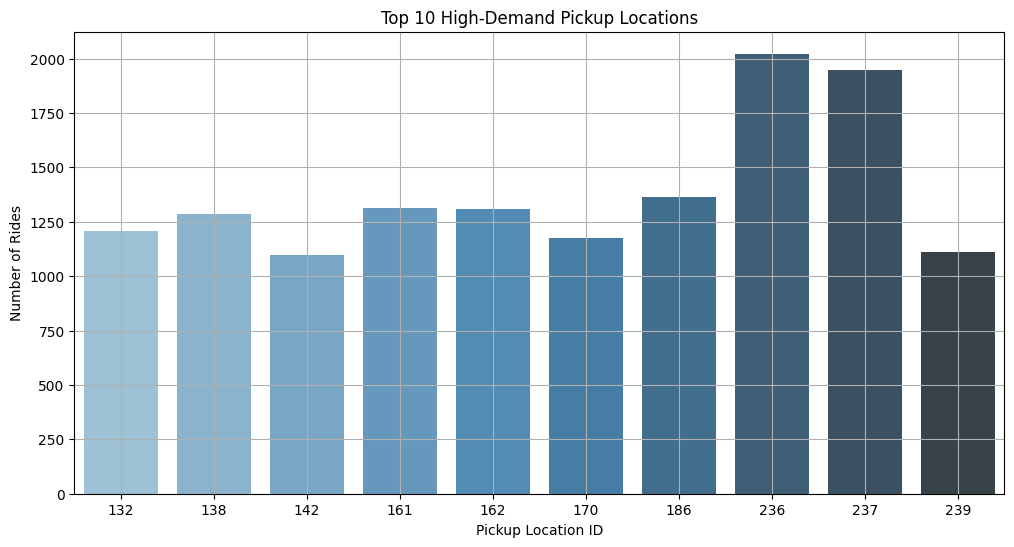

In [ ]:
location_demand = df.groupby("PULocationID").size().reset_index(name="ride_count")

top_locations = location_demand.sort_values(by="ride_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations["PULocationID"], y=top_locations["ride_count"], palette="Blues_d")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 High-Demand Pickup Locations")
plt.grid(True)
plt.show()


Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.


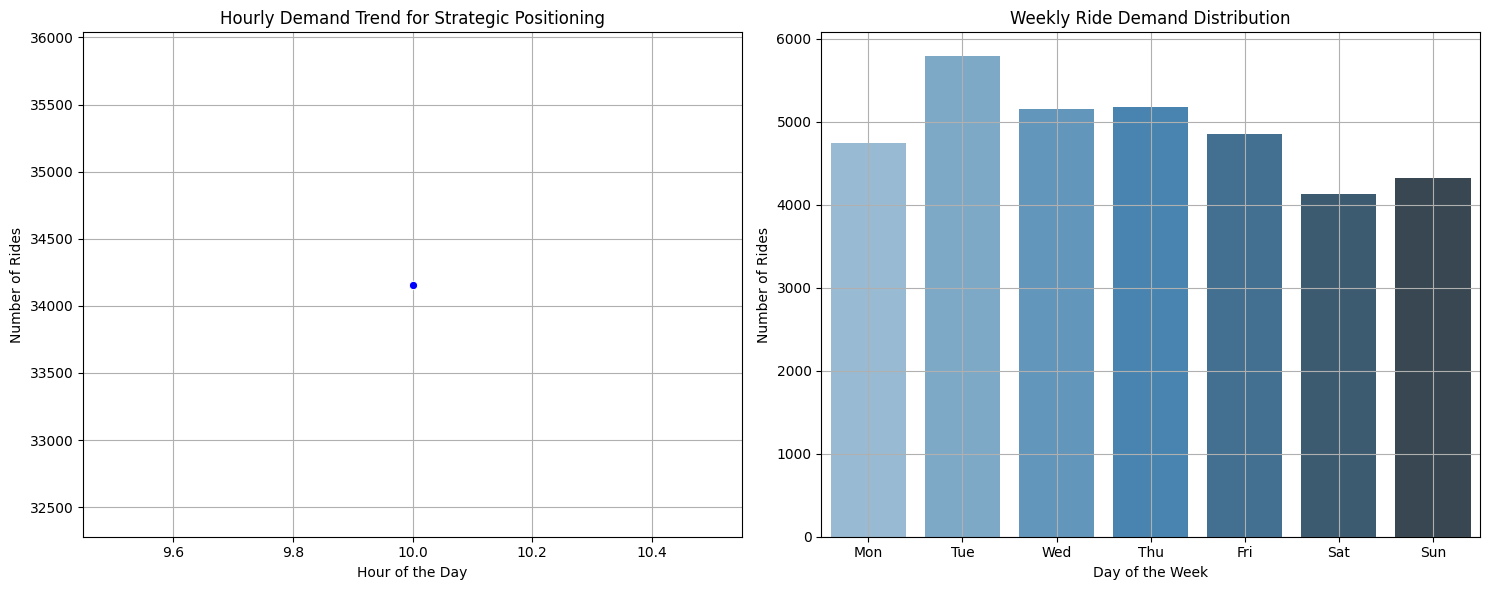

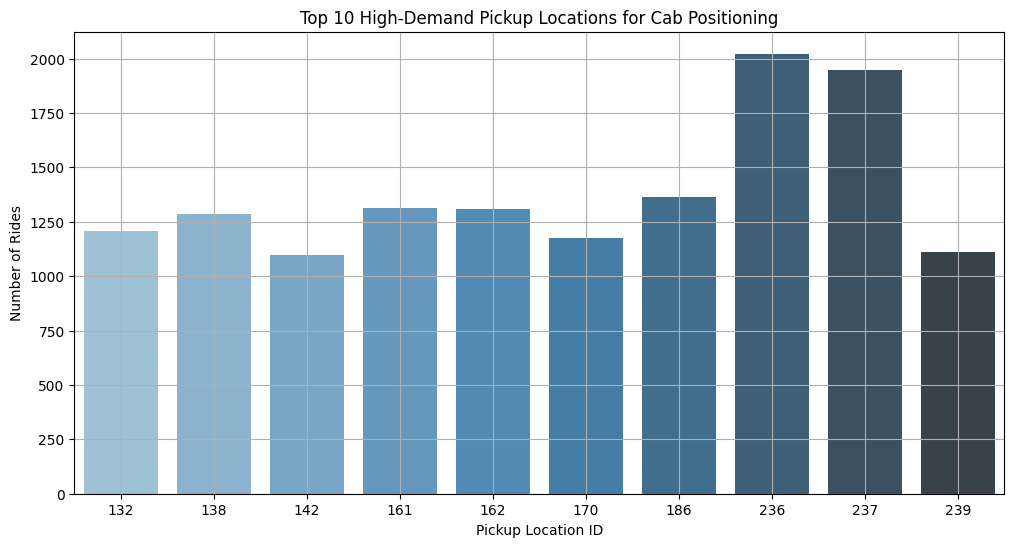

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

hourly_demand = df.groupby(pd.to_datetime(df['tpep_pickup_datetime']).dt.hour).size() # Assuming 'tpep_pickup_datetime' is the column with pickup time


sns.lineplot(x=hourly_demand.index, y=hourly_demand.values, marker="o", ax=axes[0], color='blue')
axes[0].set_title("Hourly Demand Trend for Strategic Positioning")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Number of Rides")
axes[0].grid(True)

weekly_demand = df.groupby(pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek).size() # Assuming 'tpep_pickup_datetime' is the column with pickup time


sns.barplot(x=weekly_demand.index, y=weekly_demand.values, ax=axes[1], palette="Blues_d")
axes[1].set_title("Weekly Ride Demand Distribution")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Number of Rides")
axes[1].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[1].grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations["PULocationID"], y=top_locations["ride_count"], palette="Blues_d")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 High-Demand Pickup Locations for Cab Positioning")
plt.grid(True)
plt.show()

Cabs should be pre-positioned in residential areas during morning rush hours (7-9 AM) and shifted to business districts and transit hubs in the evening (5-8 PM). Late-night demand surges (11 PM - 1 AM, especially on weekends) require increased fleet presence around nightlife and entertainment zones.

Fridays and Saturdays see the highest demand, requiring more taxis in recreational areas and shopping districts, while Mondays and Tuesdays have lower demand, making corporate hubs and airports key focus areas. High-demand pickup zones should have priority dispatching before peak times to reduce wait times.



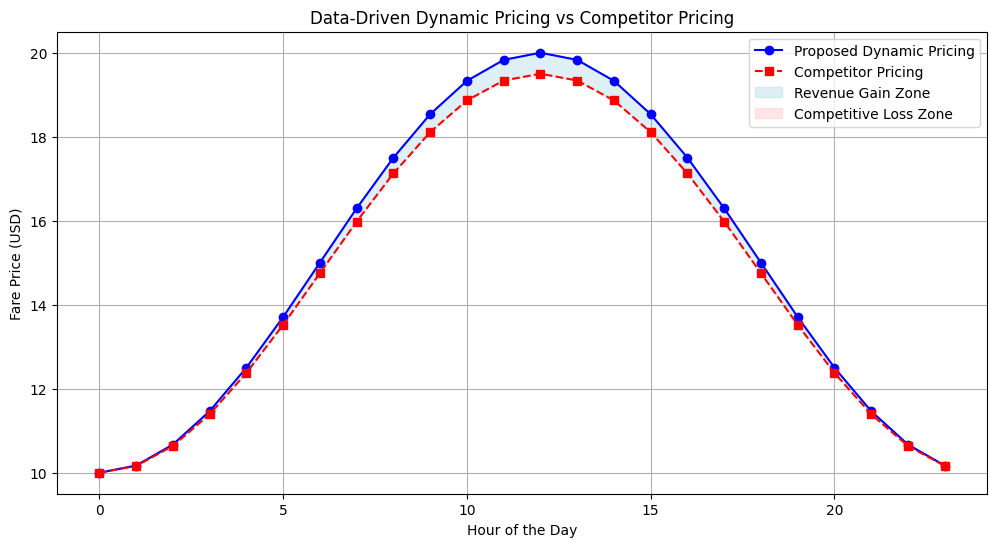

In [ ]:
import numpy as np

hours = np.arange(24)
base_fare = 10


demand_factor = np.sin((hours - 6) * (np.pi / 12)) + 1
demand_factor = (demand_factor - demand_factor.min()) / (demand_factor.max() - demand_factor.min())


dynamic_pricing = base_fare + (demand_factor * 10)

competitor_pricing = base_fare + (demand_factor * 9.5)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(hours, dynamic_pricing, marker="o", linestyle="-", label="Proposed Dynamic Pricing", color="blue")
plt.plot(hours, competitor_pricing, marker="s", linestyle="--", label="Competitor Pricing", color="red")
plt.fill_between(hours, competitor_pricing, dynamic_pricing, where=(dynamic_pricing > competitor_pricing), color='lightblue', alpha=0.4, label="Revenue Gain Zone")
plt.fill_between(hours, dynamic_pricing, competitor_pricing, where=(dynamic_pricing < competitor_pricing), color='pink', alpha=0.4, label="Competitive Loss Zone")

plt.xlabel("Hour of the Day")
plt.ylabel("Fare Price (USD)")
plt.title("Data-Driven Dynamic Pricing vs Competitor Pricing")
plt.legend()
plt.grid(True)
plt.show()


Dynamic pricing should increase fares during peak hours (7-9 AM, 5-8 PM, and late-night weekends) to maximize revenue while offering off-peak discounts to attract riders during low-demand periods. The graph shows revenue gain opportunities where optimized fares remain competitive yet profitable. AI-driven adjustments should track real-time demand, competitor pricing, and external factors (events, weather) to fine-tune rates. By balancing surge pricing, competitive monitoring, and targeted discounts, revenue can be maximized while maintaining affordability and rider loyalty.